<a href="https://colab.research.google.com/github/Youngpyoryu/Lecture_Note/blob/main/Deep_learning_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced course


---------------------------------------------------------------------------------

### Computer Vision task

1. Classification

2. Classification + Localization

3. Object Detection

4. Instance Segmentation

---------------------------------------------------------------------------------

<p  align  =  "center">

<image  src  =  'https://www.researchgate.net/publication/340681873/figure/fig1/AS:881351528022016@1587141987049/Classification-object-detection-and-instance-segmentation-9.png'>

</p>

- classification : Single object에 대해서 object의 클래스를 분류하는 문제

- Classification + Localization : Single object에 대해서 object의 위치를 bounding box(BB)로 찾고 (localization) + 클래스를 분류하는 문제(Classification)

- object detection : 다중 물체에서 각각의 object에 대해 Classification + Localization을 수행하는 것.

- Instance Segmentation : Object Detection과 유사하지만, 다른 점은 object의 위치를 Bounding box(BB)가 아닌 실제 edge로 찾는 것.

  
  
  

--------------------------------------------------------------------------------

본격적으로 Object Detection 모델에 대해 살펴보도록 하겠습니다. 어떤 논문을, 어떤 순서에 따라 읽어야할지 고민하던 중, hoya님이 작성하신 2014~2019년도까지의 [Object Detection 논문 추천 목록](https://github.com/hoya012/deep_learning_object_detection)을 보게 되었습니다.

  

<img  src  =  'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdsPLzF%2FbtqOhOxs7rM%2FKL50KxObME0vjKpMkoqHuK%2Fimg.png'>

  

**'빨간색'**은 꼭 봐야하는 논문입니다.

  

호야님의 순서와

  

https://paperswithcode.com/methods/category/convolutional-neural-networks

  

이 목록들을 살펴보면서 앞으로 글을 작성하려고 합니다.


---------------------------------------------------------------------------------

object detection에는 1-stage detector,2-stage detector가 있다.

<p  align  =  "center">

<img  src  =  'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F4Fi2X%2FbtqCWbZjit2%2FsN9Ba7jKxiVI0h4S5InzMk%2Fimg.png'>

그림 출처 : https://ganghee-lee.tistory.com/35

</p>

  

2-stage를 한눈에 볼 수 있는 그림.

  

- 알고리즘 및 네트워크를 통해 물체가 있을만한 영역을 우선 뽑아 내는 과정을 거친다.

- 이 영역을 ROI(region of Interest)라고 한다.

  
  

1-stage detector의 대표적인 모델은 YOLO(You Only Look Once) 계열이 있다.

  

<p  align  =  "center">

<img  src  =  'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fds1hoJ%2FbtqCX8tXMTh%2FJlGldm3aTsGzwiratKhbqK%2Fimg.png'>

</p>

  

- 1-stage는 2-stage와 다르게 ROI 영역을 추출하지 않고, 전체 image에 대해서, convolution network로 classification, localization을 수행한다.

- 속도 측면에서는 장점이 매우 많지만, image에서 여러 물체가 섞여 있다면 정확도를 떨어진다.

- RCNN paper 는 기존의 방법 MAP(Mean Average Prcecision)이 30%이상 향상되고 더 간단하고 확장 가능한 Detection 알고리즘이다.

### 2가지 인사이트를 설명.
1. Localize와 Segmentation을 위해 Bottom-up(상향식) 방식의 Region Proposals에 CNN을 적용했다.
2. label data가 부족할 때, 보조작업(Auxiliary Task)를 Supervised pre-training과 뒤를 domain-specific fine-tuning을 통해 상당항 성능 향상을 이뤘다.


- R-CNN : Regions with CNN Feature로 작업을 하고 CNN+Region Proposals

<img src='https://images.velog.io/images/skhim520/post/fa1ea5cf-6064-490d-ad52-dd6d5d00bbfe/image.png'>

1. 이미지를 입력한다.,
2. 약 2000개의 bottom-up region proposals를 추출
3. CNN을 이용해 각각 Region proposal의 특징을 계산.
4. Linear SVM를 이용해 각각의 label을 분류.

## Three Modules for R-CNN
1. Region Proposals : Detector가 이용가능한 영역 후보의 집합
2. CNN : 각각의 region에 대한 고정된 크기의 Feature Vector를 추출
3. Lienar SVMs : 분류를 진행.

# 1. Region Proposals

<img src = 'https://images.velog.io/images/skhim520/post/1af4b904-c107-49c6-9e27-5051355abff0/image.png'>

 - Selective Search


 <img src = 'https://images.velog.io/images/skhim520/post/46a65a29-5951-44c9-b9f7-885b1432dd30/image.png'>

 1. 색상, 질감, 영역 크기 등을 이용해 Non-Object segemenation을 수행. 이 작업을 통해 좌측 제일 하단 그림과 같이 많은 small segmented ares들을 얻을 수 있다.

 2. Bottom-up 방식으로 small segemented ares들을 합쳐서 더 큰 Segmented areas들을 만든다.
 3. (2)의 작업을 반복하여 최종적으로 2000개의 region proposal을 생성.

 2000장의 Region Proposals을 얻게 되면 warp을 통해 이미지를 227$*$227로 사이즈를 통합해 준다.(CNN architecture는 고정된 227$*$227 pixel size의 입력을 요구한다.)

 2. CNN


 <img src = 'https://images.velog.io/images/skhim520/post/e982eb1a-6c3c-42e8-bc82-65a84d85b629/image.png'>

 R-CNN에서는 CNN arichitecture를 AlexNet을 이용했다. 이때, classification dataset을 이용해 pre-trained된 AlexNet 구조를 이용한다. 이후 Domain-specific fine-tuning을 통해 CNN을 다시 학습시킨다. 이렇게 학습된 CNN은 region proposals 2000개의 각각의227x227 image를 입력받아 4096-dimensional feature vector를 추출한다.

### Domain-specific fine tuning

<img src = 'https://images.velog.io/images/skhim520/post/98d25442-c210-46e7-9991-19233c8af219/image.png'>

2000장의 region proposals와 ground-truth box의 IoU(Intersection of Union)을 비교하여 IoU가 0.5보다 큰 경우 positive samples, 0.5보다 작은 경우 negative samples로 나눈다. 이렇게 sample을 나눴을 때, ground truth만 positive sample로 정의할때 보다 30배 많은 학습데이터를 얻을 수 있다. 많은 데이터를 통해 overfitting을 방지한다. Positive sample는 객체가 포함되어 있는 sample을 의미하고, negative sample은 객체가 포함되지 않은 배경 sample을 의미한다. 이렇게 나눈 후 positive sample 32개 + negative sample 96개 = 128개의 이미지로 이루어진 하나의 미니 배치를 만든다.
이렇게 생성된 배치들을 이용해 fine-tuning을 진행한다. fine-tuning을 하기 위해서 기존의 pre-trained된 AlexNet의 마지막 softmax layer를 수정해서 N+1 way classification을 수행하게 한다. 이때, N은 R-CNN에서 사용하는 dataset의 객체들의 종류의 개수이고, 1을 더해준 이유는 배경인지 판단하기 위해서이다. SGD를 통해 N+1 way classification을 수행하면서 학습된 CNN 구조는 domain-specific fine-tuning을 이룬다.
마지막의 N+1 way classification을 위해 수정한 softmax layer는 R-CNN 모델 사용시 사용하지 않는다. 왜냐하면 softmax layer는 fine-tuning을 위해 사용한 것이고, 원래 R-CNN에서 CNN 구조의 목표는 4096-dimensional feature vector를 추출하는 것이기 때문이다.

- IOU(intersection of Union)

<img src = 'https://images.velog.io/images/skhim520/post/d3aa6530-bf4a-4678-a1a6-87adf9ae2e63/image.png'>

<img src = 'https://images.velog.io/images/skhim520/post/d630bea9-7f1b-45f0-b427-592d011b7b9f/image.png'>

## Linear SVMs

<img src = 'https://images.velog.io/images/skhim520/post/2def7c28-3f7d-4ffd-ba6d-ecaddd83ccc0/image.png'>

<img src = 'https://images.velog.io/images/skhim520/post/35fef43c-8e70-4541-98c7-051cad84406a/image.png'>

2000장의 region proposals에서 fine-tuning때와는 다르게 ground truth box만을 positive sample, IoU 값이 0.3보다 작은 것은 negative sample로 지정한다. 이때, IoU값이 0.3보다 큰 경우 무시한다. 이때 0.3은 gird search를 통해 찾은 값이다. 이후는 fine-tuning과 마찬가지로 positive sample 32개 + negative sample 96개 = 128개의 미니배치를 구성한 후 fine-tuning된 AlexNet에 입력하여 4096 dimensional feature vector를 추출한다. 추출된 벡터를 이용해 linear SVMs를 학습한다. SVM은 2진 분류를 수행하므로 분류하려는 객체의 종류만큼 SVM이 필요하다. 학습이 한 차례 끝난 후, hard negative mining 기법을 적용하여 재학습을 수행한다.

R-CNN에서는 단순히 N-way softmax layer를 통해 분류를 진행하지 않고, SVMs를 이용해 분류를 한다. 이는 SVM을 사용했을 때 성능이 더 좋기 때문이다. 성능 차이의 이유를 논문의 저자들은 positive sample을 정의할 때 SVM을 학습시킬 때 더 엄밀하게 정의한다는 점과 SVM이 hard negative를 이용해 학습하기 때문이라고 서술했다.

linear SVM에서는 output으로 class와 confidence score를 반환한다.

<img src = 'https://images.velog.io/images/skhim520/post/7bb64312-21f8-44f7-8217-cc72b1a1b892/image.png'>

이미지에서 사람을 탐지하는 경우 사람은 positive sample이 되고, 그 외의 배경은 negative sample이 된다. 이때, 모델이 bounding box를 배경이라고 예측하고 실제로 배경인 경우 true negative sample라고 한다. 반면에 모델이 사람이라고 예측했지만, 실제로 배경인 경우 false positive sample에 해당한다.

객체 탐지 시, positive sample보다 negative sample이 더 많은 클래스 불균형 때문에 모델은 주로 false positive 오류를 주로 범하게 된다. 이러한 문제를 해결하기 위해 처음 linear SVMs를 학습시킬 때의 false positive sample들을 epoch마다 학습 데이터에 추가하여 학습을 진행한다. 이를 통해 모델이 강건해지고, false positive 오류가 줄어든다.

### Bounding Box Regressor

<img src ='https://images.velog.io/images/skhim520/post/553f0c27-aee1-4489-b43b-da53df7f9c52/image.png'>

Seletive Search 알고리즘을 통해 얻은 객체의 위치는 부정확할 수 있다. 이런 문제 해결하기 위해서 객체의 위치를 조절해주는 Bounding box Regressor.

$N$개의 Training Pair $ \{{(P^{i},G^{i})}\}_{i=1, {\cdots}, N}$ 에 대해 $P^{i} = ({P_{x}}^{i},{P_{y}}^{i},{P_{w}}^{i},{P_{h}}^{i})$는 해당 region에 대한 추정값으로 각각은 region 중심은 x,y좌표와 width,height를 나타내고,$G^{i} = ({G_{x}}^{i},{G_{y}}^{i},{G_{w}}^{i},{G_{h}}^{i})$ 은 해당 region에 대한 ground truth이다.

<img src = 'https://media.vlpt.us/images/skhim520/post/5d57ac72-364d-470b-96d2-174c7f1db113/image.png'>

위의 식에서  $W_a$를 찾고 싶다. (a = x,y,w,h 를 별표기가 어려워서 치환)

- ${\hat {w}_a}$ : 학습되는 가중치.
- ${\phi}_5(P^{i})$ :$P^{i}$에 해당하는 Feature Vector. 여기서 Feature Vector는 Fine-tuning된 CNN의 Output
- ${\lambda}$: Ridge Regression에 대한 상수


<img src = 'https://media.vlpt.us/images/skhim520/post/f4f0a7cc-4a6a-4dd7-89a8-5ee691cfa7f2/image.png'>

위의 식을 통해 찾은 $W_a$를 이용해 $d_a$ transformation 함수를 정의.

<img src = 'https://media.vlpt.us/images/skhim520/post/73114071-825e-4818-b748-e5fc04060f23/image.png'>

위와 같은 training pair를 정의할 때, P는 ground truth와 IoU 값이 0.6이상인 경우만 사용한다. 왜냐하면 겹치는 영역이 많이 작을 경우, 학습의 어려움이 존재하기 때문이다.

## Non maximum Supression

R-CNN을 통해 얻게 되는 2000개의 bounding box를 전부 다 표시할 경우우 하나의 객체에 대해 지나치게 많은 bounding box가 겹칠 수 있다. 따라서 가장 적합한 bounding box를 선택하는 Non maximum supression 알고리즘을 적용한다.

<img src = 'https://images.velog.io/images/skhim520/post/4e3627c5-1c63-481f-b635-5e0246b0c687/image.png'>


non maximum supression 알고리즘은 다음과 같다.

bounding box별로 지정한 confidence scroe threshold 이하의 box를 제거한다.
남은 bounding box를 confidence score에 따라 내림차순으로 정렬한다. 그 다음 confidence score가 높은 순의 bounding box부터 다른 box와의 IoU값을 조사하여 IoU threshold 이상인 box를 모두 제거한다.
2의 과정을 반복하여 남아있는 box만 선택한다.


 - 단점
  - 이미지 한 장당 2000개의 region proposal을 추출하므로 학습 및 추론의 속도가 느리다.
 - 3가지 모델을 사용하다보니 구조와 학습 과정이 복잡하다. 또한 end-to-end 학습을 수행할 수 없다.

RCNN의 계열

RCNN->fast RCNN->Faster RCNN

#Faster RCNN
- RCNN에서 문제가 되었던게, RPN(Region Proposal Networks) 너무 느림.

<img src = 'https://curt-park.github.io/images/faster_rcnn/Figure2.png'>

 ## RPN(Region Proposal Networks)

- image을 받아, 사각형 형태(Bounding box)의 Object Proposal과 Objectness Score 출력해주는 역할을 함.

- 이는 Fully Convolutional network 형태, Fast R-CNN과 Convoltional layer를 공유하게끔 디자인되어 있는 형태.

### Anchor Box
- sliding window의 각 위치에서 Bounding box의 후보를 사용되는 상자.

<img src = 'https://curt-park.github.io/images/faster_rcnn/Figure1.png'>

직관적으로 보면, 동일한 크기의 Sliding window를 이동시키며, window의 위치를 중심으로 사전에 정의된 다양한 비율/크기의 anchor box들을 적용하며 Feature를 추출. 이는 image/feature pyramids처럼 image 크기를 조정할 필요가 없으며, multiple-scaled sliding window처럼 filter 크기를 변경할 필요도 없으므로 계산효율이 높은 방식이라 할 수 있다. 논문에서는 3가지 크기와 3가지 비율의, 총 9개의 anchor box들을 사용하였다.

<img src = 'https://t1.daumcdn.net/cfile/tistory/990482355B659B5720'>

Region Proposal Network (RPN)은 convolution을 사용하여 구현이 되며, input 값은 이전 base network에서 뽑아낸 feature maps을 사용합니다. 
Region proposals을 생성하기 위해서는 base network에서 생성한 feature maps위에 n x n spatial window (보통 3 x 3)를 슬라이드 시킵니다. 각각의 sliding-window가 찍은 지점마다, 한번에 여러개의 region proposals을 예측하게 됩니다. Region proposals의 최고 갯수는 k로 나타내며, 이것을 Anchor 라고 부릅니다. 보통 각 sliding window의 지점마다 9개의 anchors가 존재하며 , 3개의 서로 다른 종횡비 (aspect ratios) 그리고 3개의 서로 다른 크기(scales) 가 조합되며 모두 동일한 중앙 지점 $(x_a,y_a)$ 을 갖고 있습니다.

<img src = 'http://incredible.ai/assets/images/faster-rcnn-sliding-window-and-anchor.png'>

<img src = 'http://incredible.ai/assets/images/faster-rcnn-region-proposal-cat.png'>



Sliding window를 통해서 나온 feature map의 depth는 더 낮은 차원이 됩니다. (예. 512 depth –> 256 depth) 이후의 output값은 1 x 1 kernel을 갖고 있는 두개의 convolutional layers로 양분되어 들어가게 됩니다.

<img src = 'http://incredible.ai/assets/images/faster-rcnn-sliding-window.png'>

Classifier를 학습시키기 위한 training data는 바로 위의 RPN으로 부터 얻은 anchors 와 ground-truth boxes (실제 사람이 직접 박스 처리한 데이터) 입니다.

모든 anchors를 foreground 이냐 또는 background이냐로 분류를 해야 합니다. 분류를 하는 기준은 어떤 anchor가 ground-truth box와 오버랩 (중복되는 면적)되는 부분이 크면 foreground이고, 적으면 background입니다. 각각의 anchor마다 foreground인지 아니면 background인지 구별하는 값을 $p^{∗}$
 값이라고 했을때 구체적인 공식은 다음과 같습니다.

 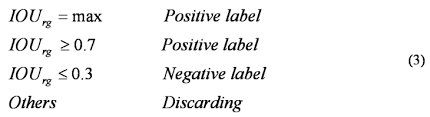

Metric : IOU(intersection over Union)

Feature map -> Convoltuional network(VGGNet, ZFnet)

<img src = 'https://miro.medium.com/max/1400/1*bFjBVvUL2Po_p2mKzC4iYQ.png'>

layer5에서 Sliding Window 작업이 있음.

## Loss fucntion.

<img src = 'https://curt-park.github.io/images/faster_rcnn/LossFunction.png'>

- $P_{i}$ : Predicted Probability of anchor
- $P_{i}^{*}$ : Ground-truth label(1 : anchor is postive, o : anchor is negative)
- lambda : Balacing parameter .Ncls,Nreg  차이를 불균형을 방지하기 위해 사용. cls에 대한 mini-bacth의 크기가 256(=Ncls)이고, 이미지 내부에서 사용된 모든 anchor의 location은 약 2,400(=Nreg)라 하면 lambda 값은 10정도로 설정.
- $t_{i}$ : Predicted Bounding box
- $t_{i}^{*}$ : Ground-truth box


<img src= 'https://curt-park.github.io/images/faster_rcnn/BBRegression.png'>

<img src = 'https://curt-park.github.io/images/faster_rcnn/SmoothL1.png'>

- end-to-end로 back-propagation 사용.
- Stochastic gradient descent
- 한 이미지당 랜덤하게 256개의 sample anchor들을 사용. 이때, Sample은 positive anchor:negative anchor = 1:1 비율로 섞는다. 혹시 positive anchor의 개수가 128개보다 낮을 경우, 빈 자리는 negative sample로 채운다. 이미지 내에 negative sample이 positive sample보다 훨씬 많으므로 이런 작업이 필요하다.
모든 weight는 랜덤하게 초기화. (from a zero-mean Gaussian distribution with standard deviation 0.01)
-  ImageNet classification으로 fine-tuning (ZF는 모든 layer들, VGG는 conv3_1포함 그 위의 layer들만. Fast R-CNN 논문 4.5절 참고.)
- Learning Rate: 0.001 (처음 60k의 mini-batches), 0.0001 (다음 20k의 mini-batches)
- Momentum: 0.9
- Weight decay: 0.0005

# 실습

Face mask Detection(https://www.kaggle.com/andrewmvd/face-mask-detection)

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

In [ ]:
!python /content/Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection

위와 같이 Face Mask Detection.zip 파일이 다운로드 된 것을 확인할 수 있습니다. 다음으로 리눅스 명령어인 unzip을 활용하여 압축파일을 풀어보도록 하겠습니다. -q 옵션을 통해 불필요한 출력물이 나오지 않게 제어 가능합니다.

In [ ]:
!unzip -q /content/Face\ Mask\ Detection.zip

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mping
import matplotlib.patches as patches
from bs4 import BeautifulSoup

바운딩 박스 시각화 코드를 테스트하기 위해 위의 패키지들을 불러옵니다. matplotlib는 시각화의 대표적인 패키지이며, glob 패키지는 파일을 다루는데 널리 쓰이는 패키지입니다. BeautifulSoup은 HTML과 XML 문서 파일을 파싱(Parsing)하는 패키지이며, 웹스크래핑(Web Scraping)에 유용하게 쓰입니다.

In [ ]:
img_list = sorted(glob.glob('/content/images/*'))
annot_list = sorted(glob.glob('/content/annotations/*'))

In [ ]:
print(len(img_list))
print(len(annot_list))

- 바운딩 박스 시각화

In [ ]:
def generate_box(obj):
  xmin = float(obj.find('xmin').text)
  ymin = float(obj.find('ymin').text)
  xmax = float(obj.find('xmax').text)
  ymax = float(obj.find('ymax').text)

  return [xmin, ymin, xmax, ymax]

def generate_label(obj):
  if obj.find('name').text =='with_mask':
    return 1
  elif obj.find('name').text =='mask_weared_incorrect':
    return 2
  return 0

def generate_target(file):
  with open(file) as f:
    data = f.read()
    soup = BeautifulSoup(data, 'html.parser')
    objects = soup.find_all('object')

    num_objs = len(objects)

    boxes = []
    labels = []

    for i in objects:
      boxes.append(generate_box(i))
      labels.append(generate_label(i))

    target = {}
    target['boxes'] = boxes
    target['labels'] = labels

    return target

def plot_image(img_path, annotation):
  img = mping.imread(img_path)

  fig,ax = plt.subplots(1)
  ax.imshow(img)

  for idx in range(len(annotation["boxes"])):
    xmin,ymin,xmax,ymax = annotation["boxes"][idx]

    if annotation['labels'][idx] ==0:
      rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin), linewidth=1, edgecolor = 'r',facecolor ='none')
    elif annotation['labels'][idx] ==1:
      rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin), linewidth=1, edgecolor = 'g',facecolor ='none')
    else:
      rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin), linewidth=1, edgecolor = 'orange',facecolor ='none')
    ax.add_patch(rect)

  plt.show()                       

In [ ]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232],bbox)

# 데이터 전처리 실습

Albumentation은 이미지 / 사진을 모델에 삽입하기 전에 [ 탄력, 격자, 모션 블러, 이동, 크기 조정, 회전, 조옮김, 대비, 밝기 등] 을 사용자 정의 할 수있는 도구입니다 .

참고 :  https://ichi.pro/ko/albumentation-sijaghagi-pytorch-yejeeseo-dib-leoning-imiji-hwagdae-gibeob-hoegdeug-78798591550456

In [ ]:
!pip install --upgrade albumentations

## Pytorch

파이토치는 2017년 초에 공개된 딥러닝 프레임워크로 개발자들과 연구자들이 쉽게 GPU를 활용하여 인공 신경망 모델을 만들고 학습시킬 수 있게 도와준다. 파이토치의 전신이라고 할 수 있는 토치(torch)는 루아 프로그래밍 언어로 되어 있었지만, 파이토치는 파이썬으로 작성되어 파이썬의 언어 특징을 많이 가지고 있다.

파이토치는 페이스북의 인공지능 연구팀 멤버들이 주로 관리하며, 독자적으로 운영되는 파이토치 포럼은 사람들이 질문을 올리면 프레임워크 개발자를 비롯한 많은 사람이 답을 해주는 등 활발히 교류가 일어나고 있다.

- GPU 연산을 사용하기 위한 Numpy 대체무

- 속도와 유연성을 극대화한 딥러닝 연구 플랫폼.

<img src='https://camo.githubusercontent.com/8390d6868155bb33770737a87f20863919ae9e25c89272427efa9a535b17b737/68747470733a2f2f692e6d6f72696f682e636f6d2f3231303332352f31323533306632372e77656270'>


| Tensorflow | Pytorch |
| --- | ----------- |
| Google | Facebook |
| Define and Run | Define by run |
| 정적 그래프 | 동적 그래프 |
| 상품에 대한 견고한 파이프라인을 가짐 | 쉬운 덕분에 많은 연구, 교습 커뮤니티가 존재 |
| 넓은 산업적 커뮤니티가 존재 | 파이토치 연구자들, 졸업자들이 산업쪽으로 많이 넘어옴 |


### PYTORCH가 무엇인가요?

Python 기반의 과학 연산 패키지로 다음과 같은 두 집단을 대상으로 합니다:

- NumPy를 대체하면서 GPU를 이용한 연산이 필요한 경우

- 최대한의 유연성과 속도를 제공하는 딥러닝 연구 플랫폼이 필요한 경우

PyTorch의 장점> (출처 : "위키백과 : PyTorch", 2019년 06월 19일)

- 설치의 간편하다

- 이해와 디버깅이 쉬운 직관적이고 간결한 코드로 구성되었다

- Define by Run 방식을 기반으로 한 실시간 결과값을 시각화한다

- 파이썬 라이브러리(Numpy, Scipy, Cython)와 높은 호환성을 가진다

- 모델 그래프를 만들 때 고정상태가 아니기 때문에 언제든지 데이터에 따라 조절이 가능하다(유연성)

- Numpy스러운 Tensor연산이 GPU로도 가능하다

- 자동 미분 시스템을 이용해 쉽게 DDN(DataDirect Networks을 짤 수 있다.

- 학습 및 추론 속도가 빠르고 다루기 쉽다.

그러나 파이토치는 그래프 형태가 동적이기 때문에 계산 그래프를 매번 새롭게 정의하여 이용한다. 그래서 딥러닝 프레임워크 중 난이도가 높은편이다. 또한 사용자가 아직 적고 관련문서 또한 텐서플로우 등에 비해서 많은 편이 아니기 때문에 검색으로 공부하기 힘든 환경에 높여있다.

### 텐서 : 데이터를 표현하는 단위

In [ ]:
import torch
print(torch.__version__)
#torch version :1.9 + cuda 10.2

In [ ]:
#스칼라 : 상수
scalar1 = torch.tensor([1.])
# print(scaler1)
scalar2 = torch.tensor([3.])

In [ ]:
add_scaler = scalar1+scalar2
print(add_scaler)

In [ ]:
sub_scalar = scalar1 - scalar2
print(sub_scalar)
#곱셈, 나눗셈도 됨

### Vector : 하나의 값을 표현할 때 2개 이상의 수치를 표현한 것.


(한 점 이 있고 방향성이 vector(수학적인 정의)

In [ ]:
vector1 = torch.tensor([1. , 2. ,3.])
vector2 = torch.tensor([4. , 5. ,6.])

#사칙연산이 됨. torch.mul / vector1 *vector2
# + :add / - : sub / * : multiple

In [ ]:
print(vector1*vector2)
print(torch.mul(vector1,vector2))
print(torch.dot(vector1,vector2)) #inner preodct.

matrix multiple / inner preduct은 다름

numpy 특성 때문에 numpy.mul / numpy.dot 의 차이?

numpy.dot -> 1차원 배열만 허락 ->numpy.mul->2차원 이상일때 작동->matrix mulitple->matrix.mult이 dot을 포함.

numpy.dot->2차원이상을 하려고 하면 자동으로 numpy.mult로 바뀐다고 하였음.

In [ ]:
# 행렬
matrix1 = torch.tensor([[1. ,2.],
                      [3., 4.]])

matrix2 = torch.tensor([[5. ,6.],
                      [7., 8.]])

In [ ]:
print(torch.add(matrix1,matrix2))
print(torch.sub(matrix1,matrix2))
print(torch.mul(matrix1,matrix2))
print(torch.div(matrix1,matrix2))
print(torch.matmul(matrix1,matrix2))

- autograd()

In [ ]:
import torch

if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

In [ ]:
batch_size = 64
input_size = 1000
hidden_size = 100
output_size = 10

In [ ]:
x = torch.randn(batch_size,
                input_size,
                device = DEVICE,
                dtype = torch.float,
                requires_grad = False #gradinet를 하면서 gradient를 update하지 말아라.
                )
y = torch.randn(batch_size,
                output_size,
                device = DEVICE,
                dtype = torch.float,
                requires_grad = False #gradinet를 하면서 gradient를 update하지 말아라.
                )
w1 = torch.randn(input_size,
                hidden_size,
                device = DEVICE,
                dtype = torch.float,
                requires_grad = True 
                )
w2 = torch.randn(hidden_size,
                output_size,
                device = DEVICE,
                dtype = torch.float,
                requires_grad = True 
                )

<img src='https://camo.githubusercontent.com/c26195c067d3f1f6e8ee452de20e35c09666e3c2acf31f5c6ae37a401609107e/68747470733a2f2f7777772e70726f6772616d6d6572736f756768742e636f6d2f696d616765732f3335322f38613761306263353335303335366537343934376236353930616631356231382e706e67'>

In [ ]:
learning_rate = 1e-6
for t in range(1,501):

  y_pred = x.mm(w1).clamp(min =0).mm(w2) #mm : matrix multiple / clamp : relu와 비슷한 함수.

  loss = (y_pred - y).pow(2).sum()
  if t % 100 == 0: #100번마다 출력->print문
    print('iteration :',t,'\t','Loss:',loss.item())
  loss.backward() #back propagation.->autograd
 
  with torch.no_grad(): #gradient 더이상 update가 일어나지 않으면. 밑에다가 저장.
    w1 -= learning_rate *w1.grad
    w2 -= learning_rate *w2.grad

    w1.grad.zero_() #w1의 gradient초기화 해주세요.
    w2.grad.zero_() #w2의 gradient초기화 해주세요.

    #초기화->loss.backward()->backprogation을 수행

## Pytorch 연습 MNST

 MNIST 데이터는 28x28로 총 784개의 픽셀로 이루어져 있다. 그렇기 때문에 784를 입력 크기 값으로 받는다. 네트워크는 총 6개의 레이어로 이루어져 있으며 숫자의 종류(0~9)에 따라 마지막 출력단은 10개로 설정한다. 각각의 활성함수(activation function)은 linear를 사용하고 마지막 출력단에서 SoftMax의 확률을 통해 0부터 9사이의 숫자로 결정된다.

In [ ]:
#Importing Library

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
#Define Neural Networks Model.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.float()
        h1 = F.relu(self.fc1(x.view(-1, 784)))
        h2 = F.relu(self.fc2(h1))
        h3 = F.relu(self.fc3(h2))
        h4 = F.relu(self.fc4(h3))
        h5 = F.relu(self.fc5(h4))
        h6 = self.fc6(h5)
        return F.log_softmax(h6, dim=1)

print("init model done")

- 하이퍼 파라미터 설정

In [ ]:
# Set Hyper parameters and other variables to train the model.

batch_size = 64
test_batch_size = 1000
epochs = 10
lr = 0.01
momentum = 0.5
no_cuda = True
seed = 1
log_interval = 200

use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
print("set vars and device done")

- 데이터 로드

In [ ]:
#Prepare Data Loader for Training and Validation

transform = transforms.Compose([
                 transforms.ToTensor(),
                 transforms.Normalize((0.1307,), (0.3081,))])

train_loader = torch.utils.data.DataLoader(
  datasets.MNIST('../data', train=True, download=True, 
                 transform=transform), 
    batch_size = batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True,
                 transform=transform), 
    batch_size=test_batch_size, shuffle=True, **kwargs)

- 모델 불러오기

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

- 훈련 / 테스트 함수 구현

In [ ]:
#Define Train function and Test function to validate.

def train(log_interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(log_interval, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format
          (test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

- 네트워크 훈련 및 테스트 적용

10 epoch 동안 학습 진행


In [ ]:
# Train and Test the model and save it.

for epoch in range(1, 11):
    train(log_interval, model, device, train_loader, optimizer, epoch)
    test(log_interval, model, device, test_loader)
torch.save(model, './model.pt')

- 네트워크 훈련 및 테스트 적용

In [ ]:
#Define Train function and Test function to validate.

def train(log_interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(log_interval, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format
          (test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## Torchvision Transforms

pip install opencv-python


참고 : Opencv(https://studyingcoder.blogspot.com/2019/01/opencv-1-opencv.html)

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from bs4 import BeautifulSoup

def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):

    if obj.find('name').text == "with_mask":

        return 1

    elif obj.find('name').text == "mask_weared_incorrect":

        return 2

    return 0


def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32) 
        labels = torch.as_tensor(labels, dtype=torch.int64) 
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image_from_output(img, annotation):
  img = img.permute(1,2,0)
  fig,ax = plt.subplots(1)
  ax.imshow(img)
  for idx in range(len(annotation["boxes"])):
    xmin, ymin, xmax, ymax = annotation["boxes"][idx]
    
    if annotation['labels'][idx] == 0 :
      rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
    elif annotation['labels'][idx] == 1 :
      rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
    else :
      rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')
    ax.add_patch(rect)
  plt.show()

In [ ]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import os
import random

In [ ]:
!mkdir /content/test_annotations/

In [ ]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import os
import random

class TorchvisionMaskDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        
        if 'test' in self.path:
            label_path = os.path.join("test_annotations", file_label)
        else:
            label_path = os.path.join("annotations", file_label)

        img = Image.open(img_path).convert("RGB")
        
        target = generate_target(label_path)
        
        start_t = time.time()
        if self.transform:
            img = self.transform(img)

        total_time = (time.time() - start_t)

        return img, target, total_time

torchvision.transforms에서 제공하는 함수를 활용해 이미지 augmentation 실습을 진행해보겠습니다. 이미지를 (300, 300) 크기로 만든 후, 224 크기로 자르도록 하겠습니다. 그리고 나서 이미지의 밝기(brightness), 대비(contrast), 채도(saturation), 색조(hue)를 무작위로 바꿔보겠습니다. 마지막으로 이미지 좌우 반전을 적용한 후 tensor로 변환하는 작업을 진행해보겠습니다.

In [ ]:
torchvision_transform = transforms.Compose([
    transforms.Resize((300, 300)), 
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionMaskDataset(
    path = '/content/images/',
    transform = torchvision_transform
)

In [ ]:
only_totensor = transforms.Compose([transforms.ToTensor()])

torchvision_dataset_no_transform = TorchvisionMaskDataset(
    path = '/content/images/',
    transform = only_totensor
)

img, annot, transform_time = torchvision_dataset_no_transform[0]
print('transforms 적용 전')
plot_image_from_output(img, annot) 

In [ ]:
img, annot, transform_time = torchvision_dataset[0]

print('transforms 적용 후')
plot_image_from_output(img, annot)

변경 전에 비해 변경 후 이미지는 앞서 언급한 변화들이 적용된 것을 볼 수 있습니다. 또한 이미지 자체적인 변화는 이뤄졌지만 바운딩 박스는 변화된 이미지에서 위치가 어긋난 것을 확인할 수 있습니다. torchvision.transform에서 제공하는 augmentation은 이미지 값에 대한 augmentation만 진행이 되며, 바운딩 박스는 같이 변환되지 않는 것을 알 수 있습니다.

이미지 분류 문제에서는 이미지가 변해도 라벨값이 고정이지만, 객체 검출 문제에서는 이미지가 변함에 따라 라벨 값 또한 함께 변해야 합니다. 3.2 절에서 이러한 문제를 해결하는 방법에 대해 알아보겠습니다. 우선 3.1 절에서는 torchvision과 albumentations 모듈 비교를 계속 진행하도록 하겠습니다. torchvision_dataset에서 이미지 변환에 소요된 시간을 계산하고 그것을 100번 반복한 시간을 아래 코드를 활용해 측정하겠습니다.

In [ ]:
total_time = 0
for i in range(100):
  sample, _, transform_time = torchvision_dataset[0]
  total_time += transform_time

print("torchvision time: {} ms".format(total_time*10))

### Albumentations

In [ ]:
class AlbumentationsDataset(Dataset):
  def __init__(self,path, transform = None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-3] + 'xml'
    img_path = os.path.join(self.path, file_image)
    
    if 'test' in self.path:
        label_path = os.path.join("test_annotations", file_label)
    else:
        label_path = os.path.join("annotations", file_label)

    #Read on image with opencv
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    target = generate_target(label_path)

    start_t = time.time()
    if self.transform:
      augmented = self.transform(image = image)
      total_time = (time.time() - start_t)
      image = augmented['image']

    return image,target,total_time

In [ ]:
# Same transform with torchvision_transform
albumentations_transform = albumentations.Compose([
    albumentations.Resize(300, 300), 
    albumentations.RandomCrop(224, 224),
    albumentations.ColorJitter(p=1), 
    albumentations.HorizontalFlip(p=1), 
    albumentations.pytorch.transforms.ToTensorV2()
])

In [ ]:
# 변경 전
img, annot, transform_time = torchvision_dataset_no_transform[0]
plot_image_from_output(img, annot)

In [ ]:
# 변경 후
albumentation_dataset = AlbumentationsDataset(
    path = 'images/',
    transform = albumentations_transform
)

img, annot, transform_time = albumentation_dataset[0]
plot_image_from_output(img, annot)

In [ ]:
total_time = 0
for i in range(100):
    sample, _, transform_time = albumentation_dataset[0]
    total_time += transform_time

print("albumentations time/sample: {} ms".format(total_time*10))

#### 확률 기반 Augmentation 조합

Albmentations는 torchvision.transforms 보다 속도가 빠를 뿐만 아니라 새로운 기능 또한 제공합니다. 이번 절에서는 Albumentations에서 제공하는 OneOf 함수에 대해 알아보겠습니다. 이 함수는 list 안에 있는 augmentation 기능 들을 주어진 확률 값에 기반하여 가져옵니다. list 값 자체의 확률 값과 더불어 해당 함수의 확률 값을 함께 고려하여 실행 여부를 결정합니다. 아래의 OneOf 함수는 각각 선택될 확률이 1 입니다. 각각의 함수 내부에 있는 3개의 albumentations 기능들 또한 각각 확률 값이 1로 부여 됬으므로, 실질적으로 1/3의 확률로 3개의 기능 중 하나가 선택되어 실행된다는 것을 알 수 있습니다. 이렇게 확률 값을 조정하여 다양한 augmentation이 가능합니다.

In [ ]:
albumentations_transform_oneof = albumentations.Compose([
    albumentations.Resize(300, 300), 
    albumentations.RandomCrop(224, 224),
    albumentations.OneOf([
                          albumentations.HorizontalFlip(p=1),
                          albumentations.RandomRotate90(p=1),
                          albumentations.VerticalFlip(p=1)            
    ], p=1),
    albumentations.OneOf([
                          albumentations.MotionBlur(p=1), #블러효과
                          albumentations.OpticalDistortion(p=1), #왜곡
                          albumentations.GaussNoise(p=1)                 
    ], p=1),
    albumentations.pytorch.ToTensorV2()
])

In [ ]:
albumentation_dataset_oneof = AlbumentationsDataset(
    path = 'images/',
    transform = albumentations_transform_oneof
)

num_samples = 10
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
  ax[i].imshow(transforms.ToPILImage()(albumentation_dataset_oneof[0][0]))
  ax[i].axis('off')

### Bounding box augmentation

In [ ]:
class BboxAugmentationDataset(Dataset):
  def __init__(self,path, transform = None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-3] + 'xml'
    img_path = os.path.join(self.path, file_image)
    
    if 'test' in self.path:
        label_path = os.path.join("test_annotations/", file_label)
    else:
        label_path = os.path.join("annotations/", file_label)

    #Read on image with opencv
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    target = generate_target(label_path)

    start_t = time.time()
    if self.transform:
      transformed = self.transform(image = image, bboxes = target['boxes'], labels = target['labels'])
      image = transformed['image']
      target = {'boxes' : transformed['bboxes'], 'labels':transformed['labels']}

    return image,target

In [ ]:
bbox_transform = albumentations.Compose(
    [albumentations.HorizontalFlip(p=1),
     albumentations.Rotate(p=1),
     albumentations.pytorch.transforms.ToTensorV2()],
    bbox_params=albumentations.BboxParams(format='pascal_voc', label_fields=['labels']),
)

In [ ]:
bbox_transform_dataset = BboxAugmentationDataset(
    path = 'images/',
    transform = bbox_transform
)

img, annot = bbox_transform_dataset[0]
plot_image_from_output(img, annot)

### 데이터 분리

In [ ]:
print(len(os.listdir('annotations')))
print(len(os.listdir('images')))

In [ ]:
!mkdir test_images
!mkdir test_annotations

In [ ]:
import random
random.seed(2021)
idx = random.sample(range(853),170)
print(len(idx))
print(idx[:10])

In [ ]:
import numpy as np
import shutil

for img in np.array(sorted(os.listdir('images')))[idx]:
  shutil.move('images/'+img, 'test_images/'+img)

for annot in np.array(sorted(os.listdir('annotations')))[idx]:
  shutil.move('annotations/'+annot, 'test_annotations/'+annot)

In [ ]:
print(len(os.listdir('annotations')))
print(len(os.listdir('images')))
print(len(os.listdir('test_annotations')))
print(len(os.listdir('test_images')))

In [ ]:
from tqdm import tqdm
import pandas as pd
from collections import Counter

def get_num_objects_for_each_class(dataset):

    total_labels = []

    for img, annot in tqdm(dataset, position = 0, leave = True):
        total_labels += [int(i) for i in annot['labels']]

    return Counter(total_labels)


train_data =  BboxAugmentationDataset(
    path = 'images/'
)

test_data =  BboxAugmentationDataset(
    path = 'test_images/'
)

train_objects = get_num_objects_for_each_class(train_data)
test_objects = get_num_objects_for_each_class(test_data)

print('\n train 데이터에 있는 객체', train_objects)
print('\n test 데이터에 있는 객체', test_objects)

## Retinanet = Resnet+ Feautre Pyramid Net


### Resnet

<img src = 'https://d2l.ai/_images/resnet-block.svg'>

<img src = 'https://paperswithcode.com/media/methods/new_teaser_TMZlD2J.jpg'>

<img src = 'https://miro.medium.com/max/2000/1*0-GVAp6WCzPMR6puuaYQTQ.png'>

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection
!unzip -q Face\ Mask\ Detection.zip

## 데이터 분리

In [ ]:
import os
import random
import numpy as np
import shutil

print(len(os.listdir('annotations')))
print(len(os.listdir('images')))

!mkdir test_images
!mkdir test_annotations


random.seed(1234)
idx = random.sample(range(853), 170)

for img in np.array(sorted(os.listdir('images')))[idx]:
    shutil.move('images/'+img, 'test_images/'+img)

for annot in np.array(sorted(os.listdir('annotations')))[idx]:
    shutil.move('annotations/'+annot, 'test_annotations/'+annot)

print(len(os.listdir('annotations')))
print(len(os.listdir('images')))
print(len(os.listdir('test_annotations')))
print(len(os.listdir('test_images')))

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt
import os

def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):

    if obj.find('name').text == "with_mask":

        return 1

    elif obj.find('name').text == "mask_weared_incorrect":

        return 2

    return 0

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32) 
        labels = torch.as_tensor(labels, dtype=torch.int64) 
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image_from_output(img, annotation):
    
    img = img.cpu().permute(1,2,0)
    
    rects = []

    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        rects.append(rect)

    return img, rects

class MaskDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        
        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("annotations/", file_label)

        img = Image.open(img_path).convert("RGB")
        target = generate_target(label_path)
        
        to_tensor = torchvision.transforms.ToTensor()

        if self.transform:
            img, transform_target = self.transform(np.array(img), np.array(target['boxes']))
            target['boxes'] = torch.as_tensor(transform_target)

        # tensor로 변경
        img = to_tensor(img)


        return img, target

def collate_fn(batch):
    return tuple(zip(*batch))

dataset = MaskDataset('images/')
test_dataset = MaskDataset('test_images/')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=collate_fn)

### 모델 불러오기

In [ ]:
!pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
retina = torchvision.models.detection.retinanet_resnet50_fpn(num_classes = 3, pretrained=False, pretrained_backbone = True)

## 전이학습

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_epochs = 30
retina.to(device)
    
# parameters
params = [p for p in retina.parameters() if p.requires_grad] # gradient calculation이 필요한 params만 추출
optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)

len_dataloader = len(data_loader)

# epoch 당 약 4분 소요
for epoch in range(num_epochs):
    start = time.time()
    retina.train()

    i = 0    
    epoch_loss = 0
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = retina(images, targets) 

        losses = sum(loss for loss in loss_dict.values()) 

        i += 1

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        epoch_loss += losses 
    print(epoch_loss, f'time: {time.time() - start}')

모델 재사용을 위해 아래 코드를 실행하여 학습된 가중치를 저장해줍니다. torch.save 함수를 활용해 지정한 위치에 학습된 가중치를 저장할 수 있습니다.

In [ ]:
torch.save(retina.state_dict(),f'retina_{num_epochs}.pt')

In [ ]:
retina.load_state_dict(torch.load(f'retina_{num_epochs}.pt'))

학습된 가중치를 불러올 때는 load_state_dict과 torch.load함수를 사용하면 됩니다. 만약 retina 변수를 새롭게 지정했을 경우, 해당 모델을 GPU 메모리에 올려주어야 GPU 연산이 가능합니다.

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
retina.to(device)

# 예측

In [ ]:
def make_prediction(model, img, threshold):
    model.eval()
    preds = model(img)
    for id in range(len(preds)) :
        idx_list = []

        for idx, score in enumerate(preds[id]['scores']) :
            if score > threshold : #threshold 넘는 idx 구함
                idx_list.append(idx)

        preds[id]['boxes'] = preds[id]['boxes'][idx_list]
        preds[id]['labels'] = preds[id]['labels'][idx_list]
        preds[id]['scores'] = preds[id]['scores'][idx_list]


    return preds

In [ ]:
from tqdm import tqdm

labels = []
preds_adj_all = []
annot_all = []

for im, annot in tqdm(test_data_loader, position = 0, leave = True):
    im = list(img.to(device) for img in im)
    #annot = [{k: v.to(device) for k, v in t.items()} for t in annot]

    for t in annot:
        labels += t['labels']

    with torch.no_grad():
        preds_adj = make_prediction(retina, im, 0.5)
        preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
        preds_adj_all.append(preds_adj)
        annot_all.append(annot)

bounding box 시각화

In [ ]:
nrows = 8
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))

batch_i = 0
for im, annot in test_data_loader:
    pos = batch_i * 4 + 1
    for sample_i in range(len(im)) :
        
        img, rects = plot_image_from_output(im[sample_i], annot[sample_i])
        axes[(pos)//2, 1-((pos)%2)].imshow(img)
        for rect in rects:
            axes[(pos)//2, 1-((pos)%2)].add_patch(rect)
        
        img, rects = plot_image_from_output(im[sample_i], preds_adj_all[batch_i][sample_i])
        axes[(pos)//2, 1-((pos+1)%2)].imshow(img)
        for rect in rects:
            axes[(pos)//2, 1-((pos+1)%2)].add_patch(rect)

        pos += 2

    batch_i += 1
    if batch_i == 4:
        break

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

colnames = ['True', 'Pred']

for idx, ax in enumerate(axes[0]):
    ax.set_title(colnames[idx])

plt.tight_layout()
plt.show()

for문을 활용해 4개의 batch, 총 8개의 이미지에 대한 실제 값과 예측 값을 시각해 보았습니다. 왼쪽 열이 실제 바운딩 박스의 라벨과 위치이며 오른쪽 열이 모델의 예측 값입니다. 마스크 착용자(초록색)는 잘 탐지하고 있는 것을 관측하고 있으며, 마스크 미착용자(빨간색)에 대해서는 가끔씩 마스크를 올바르지 않게 착용한 것(주황색)으로 탐지한 것을 볼 수 있습니다. 전반적인 모델 성능을 평가하기 위해 mean Average Precision (mAP)를 산출해보겠습니다. mAP는 객체 탐지 모델을 평가할 때 사용하는 지표입니다.

데이터 다운로드시 불러왔던 Tutorial-Book-Utils 폴더 내에는 utils_ObjectDetection.py 파일이 있습니다. 해당 모듈 내에 있는 함수를 활용해 mAP를 산출해보겠습니다. 우선 utils_ObjectDetection.py 모듈을 불러옵니다

In [ ]:
%cd Tutorial-Book-Utils/
import utils_ObjectDetection as utils

In [ ]:
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += utils.get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 

In [ ]:
true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]  # 배치가 전부 합쳐짐
precision, recall, AP, f1, ap_class = utils.ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
mAP = torch.mean(AP)
print(f'mAP : {mAP}')
print(f'AP : {AP}')

## Faster RCNN


### 모델 불러오기¶


torchvision.models.detection에서는 Faster R-CNN API(torchvision.models.detection.fasterrcnn_resnet50_fpn)를 제공하고 있어 쉽게 구현이 가능합니다. 이는 COCO 데이터셋을 ResNet50으로 pre-trained한 모델을 제공하고 있으며, pretrained=True/False로 설정할 수 있습니다.

이후 모델을 불러올 때는 num_classes에 원하는 클래스 개수를 설정하고 모델을 사용하면 됩니다. Faster R-CNN 사용 시 주의할 점은 background 클래스를 포함한 개수를 num_classes에 명시해주어야 합니다. 즉, 실제 데이터셋의 클래스 개수에 1개를 늘려 background 클래스를 추가해주어야 합니다.

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection
!unzip -q Face\ Mask\ Detection.zip

### 데이터 분리

In [ ]:
import os
import random
import numpy as np
import shutil

print(len(os.listdir('annotations')))
print(len(os.listdir('images')))

!mkdir test_images
!mkdir test_annotations


random.seed(1234)
idx = random.sample(range(853), 170)

for img in np.array(sorted(os.listdir('images')))[idx]:
    shutil.move('images/'+img, 'test_images/'+img)

for annot in np.array(sorted(os.listdir('annotations')))[idx]:
    shutil.move('annotations/'+annot, 'test_annotations/'+annot)

print(len(os.listdir('annotations')))
print(len(os.listdir('images')))
print(len(os.listdir('test_annotations')))
print(len(os.listdir('test_images')))

In [ ]:
import os
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import Image
import torch
import torchvision
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import time

In [ ]:
def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

adjust_label = 1

def generate_label(obj):

    if obj.find('name').text == "with_mask":

        return 1 + adjust_label

    elif obj.find('name').text == "mask_weared_incorrect":

        return 2 + adjust_label

    return 0 + adjust_label

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32) 
        labels = torch.as_tensor(labels, dtype=torch.int64) 
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image_from_output(img, annotation):
    
    img = img.cpu().permute(1,2,0)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 1 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 2 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [ ]:
class MaskDataset(object):
    def __init__(self, transforms, path):
        '''
        path: path to train folder or test folder
        '''
        # transform module과 img path 경로를 정의
        self.transforms = transforms
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))


    def __getitem__(self, idx): #special method
        # load images ad masks
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        
        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("annotations/", file_label)

        img = Image.open(img_path).convert("RGB")
        #Generate Label
        target = generate_target(label_path)
        
        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self): 
        return len(self.imgs)

data_transform = transforms.Compose([  # transforms.Compose : list 내의 작업을 연달아 할 수 있게 호출하는 클래스
        transforms.ToTensor() # ToTensor : numpy 이미지에서 torch 이미지로 변경
    ])

def collate_fn(batch):
    return tuple(zip(*batch))

dataset = MaskDataset(data_transform, 'images/')
test_dataset = MaskDataset(data_transform, 'test_images/')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=collate_fn)

In [ ]:
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
def get_model_instance_segmentation(num_classes):
  
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

### 전이학습

In [ ]:
model = get_model_instance_segmentation(4)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 
model.to(device)

In [ ]:
torch.cuda.is_available()

In [ ]:
num_epochs = 10
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)

In [ ]:
print('----------------------train start--------------------------')
for epoch in range(num_epochs):
    start = time.time()
    model.train()
    i = 0    
    epoch_loss = 0
    for imgs, annotations in data_loader:
        i += 1
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        loss_dict = model(imgs, annotations) 
        losses = sum(loss for loss in loss_dict.values())        

        optimizer.zero_grad()
        losses.backward()
        optimizer.step() 
        epoch_loss += losses
    print(f'epoch : {epoch+1}, Loss : {epoch_loss}, time : {time.time() - start}')

In [ ]:
torch.save(model.state_dict(),f'model_{num_epochs}.pt')

In [ ]:
model.load_state_dict(torch.load(f'model_{num_epochs}.pt'))

### 예측

In [ ]:
def make_prediction(model, img, threshold):
    model.eval()
    preds = model(img)
    for id in range(len(preds)) :
        idx_list = []

        for idx, score in enumerate(preds[id]['scores']) :
            if score > threshold : 
                idx_list.append(idx)

        preds[id]['boxes'] = preds[id]['boxes'][idx_list]
        preds[id]['labels'] = preds[id]['labels'][idx_list]
        preds[id]['scores'] = preds[id]['scores'][idx_list]

    return preds

In [ ]:
with torch.no_grad(): 
    # 테스트셋 배치사이즈= 2
    for imgs, annotations in test_data_loader:
        imgs = list(img.to(device) for img in imgs)

        pred = make_prediction(model, imgs, 0.5)
        print(pred)
        break

In [ ]:
_idx = 1
print("Target : ", annotations[_idx]['labels'])
plot_image_from_output(imgs[_idx], annotations[_idx])
print("Prediction : ", pred[_idx]['labels'])
plot_image_from_output(imgs[_idx], pred[_idx])

In [ ]:
from tqdm import tqdm

labels = []
preds_adj_all = []
annot_all = []

for im, annot in tqdm(test_data_loader, position = 0, leave = True):
    im = list(img.to(device) for img in im)
    #annot = [{k: v.to(device) for k, v in t.items()} for t in annot]

    for t in annot:
        labels += t['labels']

    with torch.no_grad():
        preds_adj = make_prediction(model, im, 0.5)
        preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
        preds_adj_all.append(preds_adj)
        annot_all.append(annot)

In [ ]:
%cd Tutorial-Book-Utils/
import utils_ObjectDetection as utils

In [ ]:
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += utils.get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 

true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]  # 배치가 전부 합쳐짐
precision, recall, AP, f1, ap_class = utils.ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
mAP = torch.mean(AP)
print(f'mAP : {mAP}')
print(f'AP : {AP}')

In [ ]:
!git clone https://github.com/chenyuntc/simple-faster-rcnn-pytorch.git

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar

In [ ]:
!tar xvf VOCtrainval_06-Nov-2007.tar
!tar xvf VOCtest_06-Nov-2007.tar
!tar xvf VOCdevkit_08-Jun-2007.tar

In [ ]:
!pip install visdom scikit-image tqdm fire ipdb matplotlib torchnet

In [ ]:
!nohup python -m visdom.server &

In [ ]:
!python /content/simple-faster-rcnn-pytorch/train.py train --env='fasterrcnn' --plot-every=100

# Transformer(https://arxiv.org/abs/1706.03762)

## Transformer 응용 사례(A survey of Visual Transformers,https://arxiv.org/abs/2111.06091v1)
<img src='https://scontent-ssn1-1.xx.fbcdn.net/v/t39.30808-6/242540319_4491032994347430_8992141151679598789_n.jpg?_nc_cat=100&cb=c578a115-7e291d1f&ccb=1-5&_nc_sid=b9115d&_nc_ohc=fCdkumJy25AAX8z97Nb&_nc_ht=scontent-ssn1-1.xx&oh=819c70e6833418fedbb59602bcf8d5a1&oe=61A2ACCD'>

## Abstract
기존 번역 모델들은 복잡한 RNN, CNN기반의 인코더-디코더 구조를 가졌다. 가장 성능이 좋은 모델은 attention mechanism으로 인코더 디코더를 연결하는 구조였다. transformer는 CNN, RNN 모듈을 완전히 없애고, 오직 attention mechanism을 기반으로 한다. 실험적으로 transformer는 두 MT task(WMT2014 english-to-german, english-to-franch)에서 우수한 성능을 보였으며 다른 task에서도 보편적으로 좋은 성능을 보였다.

- 성능이 우월했으며, 병렬화 통해 train에 요구되는 시간을 획기적으로 줄였다. 기계번역 뿐만 아니라 English constituency parsing 등의 다른 task 에도 일반화가 잘됬다.

## Introduction

RNN, 특히 LSTM과 GRU는 시퀀스모델링 및 언어모델링, 기계번역 등의 transduction 문제에서 state of the art 접근법으로 자리매김해왔었다. recurrent 한 언어모델들과 encoder-decoder 구조의 한계를 넓히기 위한 많은 노력들이 계속되고있다.

recurrent한 모델은 전형적으로 input과 output 시퀀스의 토큰 위치에 따라 계산을 분해하여 진행한다. 계산시점에서 각 step에 따라 위치를 정렬시키고 hidden state $h_t$ 를 $h_{t−1}$ 과 t step의 input으로부터 생성한다. 이 본질적으로 sequential한 특성은 훈련과정에서의 병렬화를 배제시키는데, 이런 메모리 제약에 의해 샘플간 배치화를 제한하여 더 긴 길이의 시퀀스를 처리할 수록 critical한 문제가 된다. 최근 연구들이 factorization trick들과 conditional computation을 이용해 모델의 퍼포먼스는 향상시키며 계산 효율성을 눈에 띄게 향상시켜왔지만, sequential computation의 근본적인 문제는 여전히 남아있다.

어텐션 메커니즘 은 input과 output 시퀀스에서 거리에 상관없는 의존성(dependency) 모델링을 가능하게 함으로써 다양한 task의 시퀀스모델링 및 transduction 모델 등에서 빠질 수 없는 part가 되어가고있다. 그러나 몇 가지 경우를 제외하고는 attention 메커니즘은 항상 recurrent network와 함께 사용된다.

이 연구에서는 input과 output간에 global한 dependency를 추출하기위해 recurrence에서 벗어나 전적으로 attention 메커니즘에만 의존하는 transformer 모델을 제안한다. 트랜스포머는 유의미한 병렬화를 가능하게 하고, 8개의 P100 GPU로 12시간 정도만 training하면, 번역의 품질에 있어서 SOTA에 도달할 수 있다

## Background



시퀀셜한 계산의 감소에 대한 목표는 Extended Neural GPU, ByteNet, ConvS2S 연구의 기반을 형성했다.

이것들은 모든 input, output 포지션에서 병렬적으로 hidden representation을 계산하는 CNN을 basic한 building block으로 사용하였다. 이 모델들에서는 input과 output의 임의의 두 위치로부터의 신호를 관계시키기위해 필요한 계산 수가 그 위치들간 거리에 따라 증가하는데, ConvS2S에서는 선형적으로, ByteNet에서는 logarithmically하게 증가한다. 이는 거리가 멀어질 수록 dependency를 학습하는데 어려워지게 만든다. 반면 트랜스포머에서는 어떤 상수 번의 계산만이 요구된다. 비록 어텐션 가중 position을 평균냄으로써 유효 해상도의 감소라는 cost가 있지만, 이후 살펴볼 Multi-Head Attention으로 상쇄시킬 수 있다.

때때로 intra-attention(내부 어텐션)이라고도 불리는 self-attention은 한 시퀀스의 representation을 계산하기 위해 해당 단일 시퀀스 내에서 서로다른 위치에 있는 요소들을 관련시키는 메커니즘이다.
이 self-attention은 reading comprehension, abstractive summarization, textual entailment and learning task-independent sentence representation 등의 다양한 task에서 성공적으로 사용되어왔다.

배열된 시퀀스의 recurrent 네트워크 대신 재귀적인 attention mechanism에 기반한 End-to-end 메모리 네트워크는 단일 언어 Question answering task와 언어 모델링 task 에서 좋은 퍼포먼스를 보여왔다.

그러나, 트랜스포머는 input과 output의 representation을 계산하기 위해 RNN이나 합성곱을 사용하지 않고 오로지 self-attention에만 의존하는 최초의 변환모델이다.

## Model Architecture

가장 경쟁력 있는 신경망 기반 시퀀스 변형모델들은 encoder-decoder 구조를 가지고있다.
여기서 encoder는 input시퀀스의 연속적인 representation인 $(x_1, {\cdots},x_{n})$ 을 다른 연속적인 representation들의 시퀀스 $z=(z_1,{\cdots},z_{n})$ 으로 매핑한다. 이 z를 가지고 decoder는 output 시퀀스 $(y_1,{\cdots},y_{m})$
 를 생성한다. (각 time step에서 하나의 element를.) 각 타임스텝에서 다음 심볼을 생성할 때, 모델은 이전에 생성된 심볼들을 추가적인 input으로써 사용하기 때문에 Auto-Regressive하다.

트랜스포머는 위와 같은 전반적인 encoder-decoder 구조를 사용하는데, self-attention과 point-wise fully connected layer들을 encoder와 decoder 각각에 쌓아올려 이용한다.

<img src ='https://images.velog.io/images/changdaeoh/post/45b80d7d-c6ef-4746-aa6c-7a96a3012a6d/image.png'>

### Encoder & decoder

- Encoder

N = 6개의 동일한 layer를 쌓아올려 구성되었다. 각각의 layer들은 2개의 sub-layer들로 구성되는데, 첫 번째는 multi-hear self-attention 메커니즘이고 두 번째는 단순 position-wise FC feed-forward 네트워크다.


이 각각의 sub-layer마다 residual connection을 차용하였고, 이후 layer normalization이 뒤따르도록 구성하였다. 즉, 각각의 sub-layer의 output이 LayerNorm( x + Sublayer(x) )가 되도록 하였다. 이 residual connection의 적용에 편의를 위해 임베딩 층을 포함한 모든 sub-layer들이 output 차원으로 $d_{model}$
​
 =512를 갖도록 통일했다. (residual connection시 element-wise addition을 진행하려면 차원이 같아야됨)

- Decoder
: decoder 또한 N = 6개의 동일한 layer를 쌓아올려 구성되었는데, encoder와 동일한 두 sub-layer 사이에 encoder의 output에 대해 multi-head attention을 수행하는 sub-layer를 추가로 삽입하였다.
encoder와 비슷하게 각 sub-layer 마다 layer normalization이 뒤따르는 residual connection을 사용하였으며, decoder stack 내의 self-attention layer를 수정하였는데, 어떤 i번째 위치에서 prediction을 진행할 때, 미래의 위치들에 접근하는 것을 불가능하게하고 해당 위치 i와 그 이전의 위치들에 대해서만 의존하도록 masking 기법을 이용하였다.

## Attention
어텐션 함수는 query, key, value, output들이 모두 벡터일 때, query와 key-value 쌍의 집합을 output에 mapping하는 것이라고 설명될 수 있다. query와 그에 대응되는 key의 연관성 함수(compatibility function)에 의해 계산된 어텐션 가중치들로 value들을 weighted sum하여 어텐션 output이 계산된다.

<img src = 'https://media.vlpt.us/images/changdaeoh/post/eef7ae6b-872f-44f6-bfdd-bd6e4d34b357/image.png'>

#Scaled Dot-Product Attention
"Scaled Dot-Product Attention"의 input은 $d_k$차원의 query와 key 그리고 $d_v$
​
 차원의 value 벡터들로 구성된다. 모든 query와 key를 내적(dot product) 하고 각각을 $d_k$ 로 나눈 뒤 value들에 대한 weight를 얻기 위해 softmax 함수를 적용한다.

실제로는 모든 쿼리들이 하나의 행렬 Q로써, 키와 밸류들은 행렬 K와 V로써 packed 되어 동시에(simultaneously) 어텐션 함수가 계산된다. 어텐션 output 또한 V와 shape가 동일한 행렬이 되며 아래와 같이 계산된다.

<img src = 'https://media.vlpt.us/images/changdaeoh/post/38f74618-6275-4b7e-92d3-a4908de4a52d/image.png'>


흔히 사용되는 어텐션 함수는 additive attention과 dot-product attention인데, dot-product attention의 경우 scaling factor로써의  ${\dfrac {1}{\sqrt{d_k}}}$
​
 를 제외하면 본 연구의 제안 알고리즘과 동일하다.
additive attention은 단일 은닉층의 feed-forward network를 이용해 연관성 함수를 계산한다. 두 방법이 이론상 동일한 복잡도를 갖는 반면, 실무에서는 dot-product attention이 고도로 최적화된 행렬곱 code로 구현될 수 있어 더 빠르고 더 공간효율적이다.

쿼리와 키 벡터의 차원 $d_k$
​
 가 작은 값일 떄는 additive attention과 dot-product attention이 유사한 퍼포먼스를 보이는 반면, $d_k$
​
 가 클 때 scaling을 적용하지 않으면 additive attention이 dot-product attention의 성능을 앞질렀다.

연구진들은 $d_k$
​
 가 커질 경우 dot product의 결과값도 커지는 경향이 있어, 결과적으로 softmax 함수에서 gradient가 매우 작아지는 saturate한 부분으로 $QK^T$
 가 input 된다고 의심하여, 이것을 방지하기 위해 ${\dfrac {1}{\sqrt{d_k}}}$
를 곱하여 스케일을 조정하였다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

### Scaled Dot-Product Attention (SDPA)
- Data $X \in \mathbb{R}^{n \times d}$ where $n$ is the number data and $d$ is the data dimension
- Query and Key $Q, K \in \mathbb{R}^{n \times d_K}$ 
- Value $V \in \mathbb{R}^{n \times d_V} $

$\text{Attention}(Q,K,V) = \text{softmax} \left( \frac{QK^T}{\sqrt{d_K}} \right)V \in \mathbb{R}^{n \times d_V} $

참고 : https://cpm0722.github.io/pytorch-implementation/transformer

In [ ]:
class ScaleDotPreoductAttention(nn.Module):
  def forward(self,Q,K,V,mask = None):
    d_k = K.size()[-1] # key dimension
    scores = Q.matmul(K.transpose(-2,-1)) / np.sqrt(d_K)
    if mask is not None:
      scores = scores.masked_fill(mask==0, -1e9)
    attention = F.softmax(scores,dim = -1)
    out = attention.matmul(V)
    return out,attention

#Demo run of scaled dot product attention
SPDA = ScaleDotPreoductAttention()
n_batch,d_K,d_V = 3,128,256 # d_K(=d_Q) does not necessarily be equal to d_V
n_Q,n_K,n_V = 30,50,50
Q = torch.rand(n_batch,n_Q,d_K)
K = torch.rand(n_batch,n_K,d_K)
V = torch.rand(n_batch,n_V,d_V)
out,attention = SPDA.forward(Q,K,V,mask = None)
def sh(x):
  return str(x.shape)[11:-1]
print('SDPA : Q%s K%s V%s => out%s attention %s' %(sh(Q),sh(K),sh(V),sh(out),sh(attention)))

## it supports 'multi-headed attention
n_batch,n_head,d_K,d_V = 3,5,128,256 
n_Q,n_K,n_V = 30,50,50 #n_K and n_V should be the same
Q = torch.rand(n_batch,n_head,n_Q,d_K)
K = torch.rand(n_batch,n_head,n_K,d_K)
V = torch.rand(n_batch,n_head,n_V,d_V)
out,attention = SPDA.forward(Q,K,V,mask = None)
#out : [n_batch X n_head X n_Q X d_V]
# attention : [n_batch X n_head X n_Q X n_K]
def sh(x):
  return str(x.shape)[11:-1]
print('SDPA : Q%s K%s V%s => out%s attention %s' %(sh(Q),sh(K),sh(V),sh(out),sh(attention)))

### Multi-Headed Attention (MHA)

$\text{head}_{\color{red}i} = \text{Attention}(Q {\color{green}W}^Q_{\color{red}i},K {\color{green}W}^K_{\color{red}i}, V {\color{green}W}^V_{\color{red}i}) $

In [ ]:
class MultiHeadedAttention(nn.Module):
    def __init__(self,d_feat=128,n_head=5,actv=F.relu,USE_BIAS=True,dropout_p=0.1,device=None):
        """
        :param d_feat: feature dimension
        :param n_head: number of heads
        :param actv: activation after each linear layer
        :param USE_BIAS: whether to use bias
        :param dropout_p: dropout rate
        :device: which device to use (e.g., cuda:0)
        """
        super(MultiHeadedAttention,self).__init__()
        if (d_feat%n_head) != 0:
            raise ValueError("d_feat(%d) should be divisible by b_head(%d)"%(d_feat,n_head)) 
        self.d_feat = d_feat
        self.n_head = n_head
        self.d_head = self.d_feat // self.n_head
        self.actv = actv
        self.USE_BIAS = USE_BIAS
        self.dropout_p = dropout_p # prob. of zeroed

        self.lin_Q = nn.Linear(self.d_feat,self.d_feat,self.USE_BIAS)
        self.lin_K = nn.Linear(self.d_feat,self.d_feat,self.USE_BIAS)
        self.lin_V = nn.Linear(self.d_feat,self.d_feat,self.USE_BIAS)
        self.lin_O = nn.Linear(self.d_feat,self.d_feat,self.USE_BIAS)

        self.dropout = nn.Dropout(p=self.dropout_p)
    
    def forward(self,Q,K,V,mask=None):
        """
        :param Q: [n_batch, n_Q, d_feat]
        :param K: [n_batch, n_K, d_feat]
        :param V: [n_batch, n_V, d_feat] <= n_K and n_V must be the same 
        :param mask: 
        """
        n_batch = Q.shape[0]
        Q_feat = self.lin_Q(Q) 
        K_feat = self.lin_K(K) 
        V_feat = self.lin_V(V)
        # Q_feat: [n_batch, n_Q, d_feat]
        # K_feat: [n_batch, n_K, d_feat]
        # V_feat: [n_batch, n_V, d_feat]

        # Multi-head split of Q, K, and V (d_feat = n_head*d_head)
        Q_split = Q_feat.view(n_batch, -1, self.n_head, self.d_head).permute(0, 2, 1, 3)
        K_split = K_feat.view(n_batch, -1, self.n_head, self.d_head).permute(0, 2, 1, 3)
        V_split = V_feat.view(n_batch, -1, self.n_head, self.d_head).permute(0, 2, 1, 3)
        # Q_split: [n_batch, n_head, n_Q, d_head]
        # K_split: [n_batch, n_head, n_K, d_head]
        # V_split: [n_batch, n_head, n_V, d_head]

        # Multi-Headed Attention
        d_K = K.size()[-1] # key dimension
        scores = torch.matmul(Q_split, K_split.permute(0,1,3,2))
        if mask is not None:
            scores = scores.masked_fill(mask==0,-1e9)
        attention = torch.softmax(scores,dim=-1)
        x_raw = torch.matmul(self.dropout(attention),V_split) # dropout is NOT mentioned in the paper
        # attention: [n_batch, n_head, n_Q, n_K]
        # x_raw: [n_batch, n_head, n_Q, d_head]

        # Reshape x
        x_rsh1 = x_raw.permute(0,2,1,3).contiguous()
        # x_rsh1: [n_batch, n_Q, n_head, d_head]
        x_rsh2 = x_rsh1.view(n_batch,-1,self.d_feat)
        # x_rsh2: [n_batch, n_Q, d_feat]

        # Linear
        x = self.lin_O(x_rsh2)
        # x: [n_batch, n_Q, d_feat]
        out = {'Q_feat':Q_feat,'K_feat':K_feat,'V_feat':V_feat,
               'Q_split':Q_split,'K_split':K_split,'V_split':V_split,
               'scores':scores,'attention':attention,
               'x_raw':x_raw,'x_rsh1':x_rsh1,'x_rsh2':x_rsh2,'x':x}
        return out

# Self-Attention Layer
n_batch = 128
n_src   = 32
d_feat  = 200
n_head  = 5
src = torch.rand(n_batch,n_src,d_feat)
self_attention = MultiHeadedAttention(
    d_feat=d_feat,n_head=n_head,actv=F.relu,USE_BIAS=True,dropout_p=0.1,device=device)
out = self_attention.forward(src,src,src,mask=None)

Q_feat,K_feat,V_feat = out['Q_feat'],out['K_feat'],out['V_feat']
Q_split,K_split,V_split = out['Q_split'],out['K_split'],out['V_split']
scores,attention = out['scores'],out['attention']
x_raw,x_rsh1,x_rsh2,x = out['x_raw'],out['x_rsh1'],out['x_rsh2'],out['x']

# Print out shapes
def sh(_x): return str(_x.shape)[11:-1] 
print ("Input src:\t%s  \t= [n_batch, n_src, d_feat]"%(sh(src)))
print ()
print ("Q_feat:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(Q_feat)))
print ("K_feat:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(K_feat)))
print ("V_feat:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(V_feat)))
print ()
print ("Q_split:  \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(Q_split)))
print ("K_split:  \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(K_split)))
print ("V_split:  \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(V_split)))
print ()
print ("scores:   \t%s  \t= [n_batch, n_head, n_src, n_src]"%(sh(scores)))
print ("attention:\t%s  \t= [n_batch, n_head, n_src, n_src]"%(sh(attention)))
print ()
print ("x_raw:    \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(x_raw)))
print ("x_rsh1:   \t%s  \t= [n_batch, n_src, n_head, d_head]"%(sh(x_rsh1)))
print ("x_rsh2:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(x_rsh2)))
print ()
print ("Output x: \t%s  \t= [n_batch, n_src, d_feat]"%(sh(x)))


### Multi-Head Attention
$d_{model}$
​
 차원의 key, value, query들을 가지고 단일 어텐션을 수행하는 대신에 쿼리, 키, 벨류를 각각 $d_k$,$d_v$,$d_q$
​
  차원으로 변환하는 서로다른 h개의 학습가능한 선형 사영(linear projection)을 진행한 뒤, 각각의 다른 projected version에 대해 병렬적으로 어텐션을 진행하는 것이 더 이롭다는 사실을 확인하였다. 각 사영 버전들로부터 서로다른 h개의 $d_v$
​
 차원 결과들을 얻고 그 결과들을 concat 한 뒤 한번 더 linear projection하여 최종 결과벡터를 얻는다.

멀티헤드 어텐션은 모델이 서로다른 domain들의 서로다른 representation 부분공간(subspace)들로부터 결합적으로(jointly) 정보에 접근하도록 한다. 단일 어텐션 헤드에서는, averaging 때문에 이러한 부분공간들로부터의 joint한 정보접근이 억제된다.

<img src= 'https://media.vlpt.us/images/changdaeoh/post/fbbb9832-272d-40e2-9a10-628c5e9c8def/image.png'>

## Applications of Attention in our Model

트랜스포머는 multi-head attention을 3가지 다른 방식으로 사용한다.

- 디코더의 "encoder-decoder attention" 층에 input되는 쿼리들은 이전 decoder layer의 output으로부터 오고, 키와 벨류들은 encoder의 최종 output으로부터 온다. 이것은 decoder의 모든 위치에서 input 시퀀스의 모든 position에 접근할 수 있음을 허용한다. 이것은 seq2seq 모델의 전형적인 encoder-decoder attention을 모방한 어텐션이다.

<img src ='https://images.velog.io/images/changdaeoh/post/45b80d7d-c6ef-4746-aa6c-7a96a3012a6d/image.png'>

인코더는 self-attention 레이어를 포함한다. self-attention 레이어에 input되는 모든 키, 벨류, 쿼리들은 동일한 하나의 시퀀스(이전 인코더 층의 output)로부터 온다. 각 인코딩 층의 position들은 이전 인코딩 층의 모든 position에 접근할 수 있다.

비슷하게 디코더 내부의 self-attention 층은 모든 디코딩 층의 position들이 이전 디코딩 층의 해당 position 이전까지의 모든 position들에 접근 가능하도록 한다. 디코더의 auto-regressive 성질을 보존하기 위해 우리는 leftward의 정보흐름(미래 시점의 단어들을 미리 조회함에 따라 현재단어 결정에 미칠 수 있는 영향)을 막아야한다. 이를 위해 -inf에 가까운 매우 작은수를 그과 같은 부적절한 조회의 위치에 더해주어 softmax를 취한 결과 해당 위치의 원소값이 0에 수렴하도록 하는 방식으로 masking을 진행한다.

## Position-wise Feed-Forward Networks
어텐션 sub-layer에 더하여, 우리의 encoder와 decoder는 각각의 position에 대해 독립적으로, 동등하게 적용되는 fully connected feed-forward network를 포함한다. 이 층은 두 번의 선형변환(linear transformation)과 그 사이에 ReLU activation을 포함한다. 공식은 아래와 같다.

<img src = 'https://media.vlpt.us/images/changdaeoh/post/b6978218-6ce7-4c17-bfee-b6384bd438fc/image.png'>

선형변환이 다른 position들에 대해 동일하게 적용되는 반면, 층간(layer to layer)에는 서로 다른 파라미터($W_1,W_2$) 를 사용한다. 이는 커널사이즈가 1인 convolution을 두번 진행하는 것으로도 생각할 수 있다. input과 output의 차원은 동일하게 $d_{model}$=512 이고, FFN 내부의 hidden layer는 2048의 차원을 갖는다.

## Embeddings and Softmax
다른 시퀀스 변환 모델들과 마찬가지로 input과 output 토큰들을 $d_{model}$
​
  차원 벡터로 변환하기 위해 학습가능한 임베딩을 사용하였다. 또한, decoder의 output으로 next-token 확률을 예측하기위해 학습가능한 선형변환과 소프트맥스 함수를 사용하였다. 이때, 두 임베딩 층과 softmax 이전의 선형변환에 동일한 가중치행렬을 공유하여 사용하였다. 임베딩 층들에서는 그 가중치들에 ${\sqrt{d_{model}}}$ 를 곱하여 사용하였다.

## Positional Encoding

저자들이 제안하는 모델이 어떠한 recurrence나 convolution도 포함하지 않기 때문에, 모델이 시퀀스의 순서를 반영 및 사용할 수 있도록 시퀀스 내의 토큰들의 상대적/절대적 위치에 관한 정보들을 주입해야만 했다. 이를 위해 우리는 encoder와 decoder의 최 하단에 위치한 input embedding에 "positional encodings"를 더하였다. positional encoding은 임베딩과 마찬가지로 $d_{model}$
​
  차원을 갖게하였고 그렇게해서 두 벡터가 더해질 수 있게하였다. 학습가능한, 혹은 고정된 positional encoding의 선택지는 매우 다양하다.

이 연구에서는 다른 주기의 sine, cosine 함수들을 사용하였다.

<img src = 'https://media.vlpt.us/images/changdaeoh/post/22a8d912-d34b-4977-9c69-2b237f6f3735/image.png'>

( pos : 토큰의 위치 인덱스, i : 벡터의 차원 인덱스)

<img src = 'https://images.velog.io/images/changdaeoh/post/bf874511-fc7e-4c63-8f69-3f55cb9d7eac/image.png'>

각 위치 인코딩의 차원 i들은 사인 곡선에 대응된다. 이러한 함수를 선택한 이유는 그 어떠한 고정된 offset값 k에 대해서도 $PE_{pos+k}$가 $PE_{pos}$
의 선형함수로써 표현될 수 있기에 모델이 상대적인 위치를 쉽게 학습할 것이라 가설을 세웠기 때문이다.

연구자들이 sine, cosine 기반 encoding 대신 학습가능한 위치 임베딩을 사용해보았는데, 두 방식이 거의 동일한 결과를 냈다. 우리는 결국 sinusoidal version을 선택했는데, 이 방식의 경우 모델이 훈련되는 동안 보았던 길이보다 더 긴 시퀀스에 대해서도 얼마든지 extrapolate 할 수 있기 때문이다.

# transformer의 장점

attention distribution이 시각화가 가능하여 사용하는 모델의 해석 가능성(설명력)을 높여준다

# Seq2Seq algorithm + attention 예제

In [ ]:
from __future__ import unicode_literals, print_function, division
#이 from은 사용자가 편리하게 하게 만든 함수들
#unicode ->아스키 코드를 변환하는 함수
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

- 데이터 다운로드(https://download.pytorch.org/tutorial/data.zip)

In [ ]:
cd ../../

In [ ]:
!wget https://download.pytorch.org/tutorial/data.zip #wget : we get의 약자.->리눅스에서 허용. 윈도우는 wget을 설치해야됨.

In [ ]:
!unzip /content/data.zip

문자 단위 RNN 튜토리얼에서 사용된 문자 인코딩과 유사하게, 언어의 각 단어들을 One-Hot 벡터 또는 그 단어의 주소에만 단 하나의 1을 제외하고 모두 0인 큰 벡터로 표현합니다. 한 가지 언어에 있는 수십 개의 문자와 달리 번역에는 아주 많은 단어들이 있기 때문에 인코딩 벡터는 더 큽니다.

## Word Index

나중에 네트워크의 입력 및 목표로 사용하려면 단어 당 고유 번호가 필요합니다. 이것을 추적하기위해 아래와 같이 나눕니다.

- 단어 -> 색인(word2index)

- 색인 -> 단어(index2word)

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc0iJ2q%2FbtqCgokPQNA%2FWgXJvZeNnGehd4dKELnd00%2Fimg.png'>

In [ ]:
SOS_token = 0
EOS_token = 1
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # SOS 와 EOS 포함

    def addSentence(self, sentence):
        for word in sentence.split(' '): 
            self.addWord(word)  
    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

### 데이터 유니코드 -> ASCII

데이터 파일이 모두 유니 코드로 되어있어 간단하게하기 위해 유니 코드 문자를 ASCII로 변환하고, 모든 문자를 소문자로 만들고, 대부분의 구두점을 지워줍니다.

In [ ]:
# 유니 코드 문자열을 일반 ASCII로 변환하십시오.
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# 소문자, 다듬기, 그리고 문자가 아닌 문자 제거


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

유니코드 정규화
다행히 아주 간단한 해결책이 있다. 문자열을 정규화된 형태(canonical form)로 나타내는 것이다.

아래는 네 가지 표준 정규화 방식이다:

- NFC: Normalization Form Canonical Composition
- NFD: Normalization Form Canonical Decomposition
- NFKC: Normalization Form Compatibility Composition
- NFKD: Normalization Form Compatibility Decomposition

### 데이터 분리

데이터 파일을 읽기 위해 파일을 라인으로 나누고, 줄안의 내용을 쌍으로 나눕니다.

In [ ]:
a = [14,52,42,1,4]
print(a)

In [ ]:
print(a.sort())

In [ ]:
print(sorted(a))

In [ ]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # 파일을 읽고 줄로 분리
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # 모든 줄을 쌍으로 분리하고 정규화
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # 쌍을 뒤집고, Lang 인스턴스 생성(class 호출.)
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

데이터 셋 만들기

많은 예제 문장에 신속하게 학습하기를 원하기 때문에 비교적 짧고 간단한 문장으로만 데이터 셋을 만듭니다.

- 최대 10단어(종료 문장 부호 포함)
- "I am" 또는 He is" 등의 형태로 번역되는 문장으로 필터링

In [ ]:
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes) #statswith : 첫 글자가 eng_prefixes이거 안에 있으면 무조건 잡아내라고.

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

### 데이터 프리프로세싱

데이터 준비를 위한 프리 프로세싱 과정

- 텍스트 파일을 읽고 줄로 분리하고, 줄을 쌍으로 분리합니다.
- 텍스트를 정규화하고 길이와 내용으로 필터링 합니다.
- 쌍을 이룬 문장들로 단어 리스트를 생성합니다.

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

### Seq2Seq 모델 생성

 

RNN은 시퀀스에서 작동하고 다음 단계의 입력으로 자신의 출력을 사용하는 네트워크입니다.

 

seq2seq 모델을 사용하면 인코더는 하나의 벡터를 생성합니다. 이상적인 경우에 입력 시퀀스의 "의미"를 문장의 N차원 공간에 있는 단일 지점인 단일 벡터로 인코딩합니다.

 

####인코더 :

Seq2Seq 네트워크의 인코더는 입력 문장의 모든 단어에 대해 어떤 값을 출력하는 RNN 입니다. 모든 입력 단어에 대해 인코더는 벡터와 은닉 상태를 출력하고 다음 입력 단어를 위해 그 은닉 상태를 사용합니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbCh7qj%2FbtqCioqREXx%2FfkxspjKejKfsaZug4qRHQ1%2Fimg.png'>

In [ ]:
class EncoderRNN(nn.Module): 
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__() 
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size) 
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1) # torch : view / numpy : reshape
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### 디코더:

디코더는 인코더 출력 벡터를 받아서 번역을 생성하기 위한 단어 시퀀스를 출력합니다.

 

본 예제는 간단한 디코더로서 인코더의 마지막 출력만을 이용합니다. 이 마지막 출력은 전체 시퀀스에서 문맥을 인코드하기 때문에 문맥 벡터(Context vector)로 불립니다. 이 문맥 벡터는 디코더의 초기 은닉 상태로 사용됩니다.

 

디코더의 매 단계에서 디코더에게 입력 토큰과 은닉 상태가 주어집니다. 초기 입력 토큰은 문자열-시작(start-of-string) <SOS> or <BOS> 토큰이고, 첫 은닉 상태는 문맥 벡터(인코더의 마지막 은닉 상태) 입니다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F49oak%2FbtqCgQ89Nry%2F0skxYOQIsbVd34HH1BKE11%2Fimg.png'>

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
      #인코더 의미 벡터(축소된 벡터) -> context vector ->one-hotencoding-> 단어로 뱉어줘야 하기 때문에.
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size 
        #의미 벡터(one-hot encoding이 아님X(숫자 중요한것만 넘어옴->one-hot encdoping))
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size) #학습이 안된, 에러인 것들을  gru로 연결해줌.(RNN recurrent)
        self.out = nn.Linear(hidden_size, output_size) # FC -> linear하게 펼쳐줌
        self.softmax = nn.LogSoftmax(dim=1) #softmax-> logsoftmax / output : 확률이 굉장히 작을수 있음->log로 키워줌.

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1) #의미 벡터(one-hot encoding이 아님X(숫자 중요한것만 넘어옴->one-hot encdoping))
        output = F.relu(output) #relu를 통해서 나감.
        output, hidden = self.gru(output, hidden) #hidden 안되는게 있으면 다시 gru로 넣어요.
        output = self.softmax(self.out(output[0])) #hideen 되었고, 좋게 학습된 것면 softmax로 나와요. 인코더->디코더이기 때문에. log을 안취함.
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### Attention 디코더:

문맥 벡터만 인코더와 디코더 사이로 전달 된다면, 단일 벡터가 전체 문장을 인코딩 해야하는 부담을 가지게 됩니다.

 

Attention은 디코더 네트워크가 자기 출력의 모든 단계에서 인코더 출력의 다른 부분에 "집중"할 수 있게 합니다. 첫째 Attention 가중치의 세트를 계산합니다. 이것은 가중치 조합을 만들기 위해서 인코더 출력 벡터와 곱해집니다. 그 결과(코드에서 attn_applied) 는 입력 시퀀스의 특정 부분에 관한 정보를 포함해야하고 따라서 디코더가 알맞은 출력 단어를 선택하는 것을 도와줍니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FHQBla%2FbtqCe4Um1DD%2Fi2PMF0utUkCDSRJJEFX6a0%2Fimg.png'>

어텐션 가중치 계산은 디코더의 입력 및 은닉 상태를 입력으로 사용하는 다른 feed-forward 계층인 attn 으로 수행됩니다. 학습 데이터에는 모든 크기의 문장이 있기 때문에 이 계층을 실제로 만들고 학습시키려면 적용 할 수 있는 최대 문장 길이 (인코더 출력을 위한 입력 길이)를 선택해야 합니다. 최대 길이의 문장은 모든 Attention 가중치를 사용하지만 더 짧은 문장은 처음 몇 개만 사용합니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbqAJ8Y%2FbtqClzkxRUU%2FxLaVFrDcz1QrihGdOoP6h1%2Fimg.png'>

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### 학습 데이터 준비

학습을 위해서 각 쌍마다 입력 Tensor(입력 문장의 단어 주소) 와 목표 Tensor(목표 문장의 단어 주소)가 필요합니다.

벡터들을 생성하는 동안 두 시퀀스에 EOS 토큰을 추가 합니다.

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

### 모델 학습

 

Teacher-Forcing은 다음 입력으로 디코더의 예측을 사용하는 대신 실제 목표 출력을 다음 입력으로 사용하는 컨셉입니다. 사용하면 수렴이 빨리 되지만 학습된 네트워크가 잘못 사용될 때 불안정성을 보입니다.

 

PyTorch의 autograd가 제공하는 자유 덕분에 간단한 if 문으로 Teacher Forcing을 사용할지 아니면 사용하지 않을지를 선택할 수 있습니다.

In [ ]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden
    '''사용 미사용 확인 '''
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing 포함: 목표를 다음 입력으로 전달
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Teacher forcing 미포함: 자신의 예측을 다음 입력으로 사용
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # 입력으로 사용할 부분을 히스토리에서 분리

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length


그리고 현재 시간과 진행률 %를 고려해 경과된 시간과 남은 예상식간을 출력하는 헬퍼 함수입니다.

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

 

전체 학습 과정은

- 타이머 시작
- optimizers와 criterion 초기화
- 학습 쌍의 세트 생성
- 도식화를 위한 빈 손실 배열 시작

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # print_every 마다 초기화
    plot_loss_total = 0  # plot_every 마다 초기화

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

## 결과 도식화

matplotlib로 학습 중에 저장된 손실 값 plot_losses 의 배열을 사용하여 도식화합니다.

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # 주기적인 간격에 이 locator가 tick을 설정
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

### 평가

평가는 대부분 학습ㅂ과 동일하지만 목표가 없으므로 각 단계마다 디코더의 예측을 되돌려 전달합니다. 단어를 예측할 때마다 그 단어를 출력 문자열에 추가합니다. 만약 EOS 토큰을 예측하면 거기서 멈춥니다. 나중에 도식화를 위해 디코더의 Attention 출력을 저장합니다.

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

학습 세트에 있는 임의의 문장을 평가하고 입력, 목표 및 출력을 출력하여 주관적인 품질 판단을 내릴 수 있습니다.

In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

학습과 평가

이러한 모든 헬퍼 함수 def 함수를 이용해서 학습을 시작할 수 있습니다.

In [ ]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 75000, print_every=5000)

In [ ]:
evaluateRandomly(encoder1, attn_decoder1)

Transformer 모델은 더 많은 병렬화가 가능하지만 많은 Seq2Seq 문제에서 품질이 우수하다는 것이 입증되었습니다. 

nn.Transformer 모듈은 입력과 출력 간의 전역 종속성을 그리기 위해 Attention 메커니즘(nn.MultiheadAtention으로 구현 된 다른 모듈)에 전적으로 의존합니다.

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqC2Eg%2FbtqCqMxMMHy%2FSGCmQ1ZSsIbwEOKHwhukA0%2Fimg.png'>

# 모델 정의

 

nn.TransformerEncoder 언어 모델링 업무에 대한 모델을 학습 합니다. 언어 모델링 작업은 주어진 단어(또는 단어 시퀀스)가 단어 시퀀스를 따를 가능성을 할당하는 것입니다. 일련의 토큰이 먼저 임베드 레이어로 전달되고 단어 순서를 설명하기 위해 위치 인코딩 레이어가 이어집니다. nn.TransformerEncoderLayer는 nn.TransformerEncoder 여러 계층으로 구성됩니다. 입력 시퀀스와 함께 자체 레이어 nn.TransformerEncoder는 시퀀스의 이전 위치에만 참석할 수 있으므로ㅗ 사각형 주의 마스크가 필요합니다. 언어 모델링 작업의 경우 향후 위치에 있는 모든 토큰을 마스크해야합니다. 실제 단어를 가지려면 nn.TransformerEncoder 모델은 최종 선형 레이어로 전송되고 그 뒤에 log-Softmax 함수가 나타납니다.



In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        from torch.nn import TransformerEncoder, TransformerEncoderLayer
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = self.decoder(output)
        return output

PositionalEncoding 모듈은 시퀀스에서 토큰의 상대 또는 절대 위치에 대한 정보를 주입합니다. 위치 인코딩은 포함과 동일한 차원을 가지므로 둘을 합칠 수 있습니다. Sine, Cosine 주파수 기능을 사용 합니다.

 

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

코드로 알아보는 PositionalEncoding.

출처 : https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec
 

모델이 문장을 이해하기 위해서는 각 단어에 대해 두가지를 알아야합니다.

단어는 무엇을 의미합니까?
문장에서 그 위치는 무엇입니까?
각 단어에 대한 임베딩 벡터는 의미를 배우므로 이제 단어의 위치를 네트워크에 알려주는 것을 입력해야합니다.


일정한 위치 별 값을 생성하기 위해 다음 함수를 사용하여 이문제에 답변했습니다.


<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FctknDr%2FbtqCkRgkRbF%2Fw5qza2K0JuYPMgQJoKDRF1%2Fimg.png'>


이 상수는 2차원 행렬입니다. Pos 는 문장의 순서를 나타내며 i는 임베딩 벡터 차원의 위치를 나타냅니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbEX1F7%2FbtqCl8WbEXZ%2F9wczZ9yW8XiVyaWsgpsZCK%2Fimg.png'>

그런 다음 pos / i 행렬의 각 값은 위의 방정식을 사용하여 계산됩니다.

위치 인코딩 매트릭스는 그 값이 상기 방정식에 의해 정의되는 상수이다. 임베딩 매트릭스에 추가될 때, 각각의 워드 임베딩은 그 위치에 특정한 방식으로 변경된다.

In [ ]:
class PositionalEncoder(nn.Module):
    def __init__(self, d_model, max_seq_len = 80):
        super().__init__()
        self.d_model = d_model
        
        # create constant 'pe' matrix with values dependant on 
        # pos and i
        pe = torch.zeros(max_seq_len, d_model)
        for pos in range(max_seq_len):
            for i in range(0, d_model, 2):
                pe[pos, i] = \
                math.sin(pos / (10000 ** ((2 * i)/d_model)))
                pe[pos, i + 1] = \
                math.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))
                
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
 
    
    def forward(self, x):
        # make embeddings relatively larger
        x = x * math.sqrt(self.d_model)
        #add constant to embedding
        seq_len = x.size(1)
        x = x + Variable(self.pe[:,:seq_len], \
        requires_grad=False).cuda()
        return x

위와 같이 모듈을 사용하면 임베딩 벡터에 위치 인코딩을 추가하여 모델에 대한 구조 정보를 제공 할 수 있습니다.

 

추가하기 전에 임베딩 값을 증가시키는 이유는 위치 인코딩을 상대적으로 작게하기 위해서입니다.

즉, 임베딩 벡터의 원래 의미를 함께 추가해도 손실되지 않습니다.

##로드 및 배치 데이터

Wikitext-2 데이터 세트를 사용 torchtext 합니다. vocab 객체는 train 데이터 셋을 기반으로하며 토큰을 텐서로 수치화하는 데 사용됩니다. 순차 데이터에서 시작 batchify() 이 함수는 데이터 세트를 열로 배열하여 데이터 크기 단위로 나눈 후 남은 토큰을 제거합니다. batch_size이 함수는 알파벳을 시퀀스(총 길이 26)와 배치 크기가 4인 경우 알파벳을 길이가 4인 4 시퀀스로 나눕니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbf1Qyg%2FbtqClyngWLi%2FQSXvO7cmxGX5myifMgICD1%2Fimg.png'>

이 열은 모델에 의해 독립적으로 취급되므로 의존도 G 및 F 학습이 불가능하지만 보다 효율적인 일괄 처리가 가능합니다.

In [ ]:
!pip install torchtext

In [ ]:
import torchtext
import torch
from torchtext.data.utils import get_tokenizer
TEXT = torchtext.legacy.data.Field(tokenize=get_tokenizer("basic_english"),
                            init_token='<sos>',
                            eos_token='<eos>',
                            lower=True)
train_txt, val_txt, test_txt = torchtext.legacy.datasets.WikiText2.splits(TEXT)
TEXT.build_vocab(train_txt)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def batchify(data, bsz):
    data = TEXT.numericalize([data.examples[0].text])
    # numericalize = 번호순으로 정렬하다
    # Divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

batch_size = 20
eval_batch_size = 10
train_data = batchify(train_txt, batch_size)
val_data = batchify(val_txt, eval_batch_size)
test_data = batchify(test_txt, eval_batch_size)

예제를 통한 이해 <Field>

출처 : https://tutorials.pytorch.kr/beginner/torchtext_translation_tutorial.html
torchtext에는 언어 변환 모델을 만들 때 쉽게 사용할 수 있는 데이터 셋을 만들기 적합한 다양한 도구가 있습니다. 그 중에서도 중요한 클래스 중 하나인 Field는 각 문장이 어떻게 전처리되어야 하는지 지정합니다.

 

Tensor로 변환하기 위한 지시 사항과 함께 데이터 유형을 정의합니다.

 

필드 클래스는 텐서로 표시 할 수있는 공통 텍스트 처리 데이터 유형을 모델링합니다. 필드의 요소에 대한 가능한 값 세트와 해당 숫자 표시를 정의하는 Vocab 오브젝트를 보유합니다. Field 객체는 또한 토큰화 방법 및 생성해야하는 Tensor의 종류와 같이 데이터 유형을 수치화하는 방법과 관련된 다른 매개 변수를 보유합니다.

 

데이터 세트의 두 열간에 공유되는 경우(QA 데이터 세트의 질문과 답변) 공유 어휘를 갖습니다.

torchtext의 Field에 있는 유용한 기능은 바로 build_vocab method로 각 언어와 연관된 어휘들을 만들어 낼 수 있습니다.

TEXT.vocab.stoi 는 어휘에 해당하는 토큰을 키로, 관련된 색인을 값으로 가지는 사전(dict)이 됩니다.

TEXT.vocab.itos 역시 사전(dict)이지만, 키와 값이 서로 반대입니다. 

 

- stoi - collections.defaultdict 인스턴트에서 트큰 문자열을 숫자 식별자로 매핑합니다.
- itos - 숫자 식별자로 색인화 된 토큰 문자열 목록

입력 및 대상 시퀀스를 생성하는 기능

 

get_batch() 함수는 변압기 모델의 입력 및 대상 시퀀스를 생성합니다. 

bptt : 소스 데이터를 length 청크로 세분화합니다.

Target : 언어 모델링 작업의 경우 모델에는 다음과 같은 단어가 필요합니다. 예를 들어 bptt 값이 2이면 i = 0에 대해 다음 두가지 변수가 나타납니다.



<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FblkfN5%2FbtqCl8V8GfA%2F6EUen9QY27krJY0vPrlMdK%2Fimg.png'>

청크는 s 트랜스포머 모델의 치수와 일치하는 치수 0을 따릅니다. 배치 차원 N은 차원 1을 따릅니다.

In [ ]:
bptt = 35
def get_batch(source, i):
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target

인스턴스 시작

 

모델은 아래 하이퍼 파라미터로 설정됩니다. vocab 크기는 voczb 객체의 길이와 같습니다.

In [ ]:
ntokens = len(TEXT.vocab.stoi) # the size of vocabulary
emsize = 200 # embedding dimension
nhid = 200 # the dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 2 # the number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 2 # the number of heads in the multiheadattention models
dropout = 0.2 # the dropout value
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout).to(device)

모델 실행

 

CrossEntropyLoss는 손실을 추적하기 위해 적용되며 SGD는 확률 적 구배 하강 방법을 최적화 프로그램으로 구현합니다. 초기 학습 속도는 5.0으로 설정되어 있습니다. StepLR은 에포크를 통해 학습 속도를 조정하는 데 적용됩니다. 훈련 중에 nn.utils.clip_grad_norm_ 함수를 사용하여 폭발을 방지하기 위해 모든 그라디언트를 함께 스케일링합니다.

In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 5.0 # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

import time
def train():
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()
    ntokens = len(TEXT.vocab.stoi)
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.view(-1, ntokens), targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = 200
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.2f} | ms/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // bptt, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    ntokens = len(TEXT.vocab.stoi)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, bptt):
            data, targets = get_batch(data_source, i)
            output = eval_model(data)
            output_flat = output.view(-1, ntokens)
            total_loss += len(data) * criterion(output_flat, targets).item()
    return total_loss / (len(data_source) - 1)

epoch을 반복합니다. 지금까지 본 Validation loss 가장 좋은 경우 모델을 저장합니다. 각 epoch 이후 학습 속도를 조정합니다.

In [ ]:
best_val_loss = float("inf")
epochs = 3 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train()
    val_loss = evaluate(model, val_data)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    scheduler.step()

- Test data set 이용 모델 평가

In [ ]:
test_loss = evaluate(best_model, test_data)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.2f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)